#CHAPTER 1: DEFINITIONS OF THE PROBLEM STATEMENT AND ANALYSING BASIC METRICS ON DATA

##**Introduction to Yulu**

HISTORY:

> `Yulu` is a `technology-driven mobility platform, enabling integrated urban mobility` across public and private modes of transport. It was founded in `2017` and headquartered in `Bengaluru`, India. Yulu operates in `Bengaluru, Delhi, Gurugram, Mumbai, Pune and Bhubaneswar` with `18000 single seater vehicles across 2.5 million users`. Yulu has raised `$19.9 million funding` as of Feb 2021.

> Starting off as a `mission to eliminate traffic congestion in India`, Yulu provides the safest commute solution through a user-friendly mobile app to enable `shared`, `solo` and `sustainable` commuting.

> `Yulu zones` are `located` at all the `appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc)` to make those first and last miles smooth, affordable, and convenient!

##**Problem Definition**

> > Yulu has `recently suffered considerable dips in its revenues`. They have contracted a consulting company to understand the factors on which the demand for these `shared electric cycles depends`. Specifically, they want to understand the `factors affecting the demand for these shared electric cycles in the Indian market.`

Objectives:

> The company wants to know:
* `Which variables are significant in 
predicting the demand for shared electric cycles in the Indian market?`
* `How well those variables describe the electric cycle demands?`

###Importing the required Libraries

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import bernoulli,binom,norm,expon,geom,poisson,lognorm
from scipy.stats import chi2_contingency,ttest_ind,f_oneway,shapiro,ks_2samp,normaltest,anderson,kruskal,chi2
import statsmodels.api as sm
import math
import io
from itertools import combinations,permutations
import warnings
from statistics import mode

###Importing the dataset `Yulu_bike_sharing.csv`

In [2]:
from google.colab import files
uploaded = files.upload()
print("Done")

Saving bike_sharing.csv to bike_sharing.csv
Done


In [3]:
yulu = pd.read_csv(io.BytesIO(uploaded['bike_sharing.csv']))
yulu = pd.read_csv("bike_sharing.csv")

In [4]:
yulu.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

###Details regarding each column in dataset

|Details|Regarding information|
|-------|---------------------|
|datetime: |datetimestamp|
|season: |season(1: spring, 2: summer, 3: fall, 4: winter)|
|holiday: |whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)|
|workingday: |if day is neither weekend nor holiday is 1, otherwise is 0|
|Weather = 1:|1: Clear, Few clouds, partly cloudy, partly cloudy|
|Weather = 2:|2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist|
|Weather = 3:|3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds|
|Weather = 4:|4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog|
|temp: |temperature in Celsius|
|atemp: |feeling temperature in Celsius|
|humidity: |humidity|
|windspeed: |wind speed|
|casual: |count of casual users|
|registered: |count of registered users|
|count: |count of total rental bikes including casual and registered|

##**Analysing Basic Metrics**

###Number of rows & columns, INFO

In [5]:
#Number of rows and columns
print("Number of rows: {},\nNumber of columns: {}".format(yulu.shape[0],yulu.shape[1]))

Number of rows: 10886,
Number of columns: 12


In [6]:
yulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


###nunique & unique values

In [7]:
#number of unique values in each column of given dataset
for i in yulu.columns:
    print(i,":",yulu[i].nunique())

datetime : 10886
season : 4
holiday : 2
workingday : 2
weather : 4
temp : 49
atemp : 60
humidity : 89
windspeed : 28
casual : 309
registered : 731
count : 822


In [8]:
#unique values of season, holiday, working day and weather (less number of nunique values)
for i in ["season","holiday","workingday","weather"]:
        print(i,sorted(yulu[i].unique()),"",sep = "\n")

season
[1, 2, 3, 4]

holiday
[0, 1]

workingday
[0, 1]

weather
[1, 2, 3, 4]



###Datatypes and its conversion

Datatype of following columns can be changed as following:

* `datetime` : datetime datatype
* `season, holiday, workingday, weather` : object datatype (categorical column)

> 

####Conversion of datetime column as 'datetime' datatype

In [9]:
yulu['datetime'] = pd.to_datetime(yulu['datetime'])

####Creating `year,month,day,hour,part_of_the_day,part_of_the_month` new columns from datetime column

In [10]:
yulu["year"] = yulu["datetime"].dt.year
yulu["month"] = yulu["datetime"].dt.month
yulu["day"] = yulu["datetime"].dt.day
yulu["hour"] = yulu["datetime"].dt.hour

In [11]:
def get_part_of_day(hour):
    return (
        "morning" if 5 <= hour <= 11
        else
        "afternoon" if 12 <= hour <= 17
        else
        "evening" if 18 <= hour <= 22
        else
        "night"
    )
yulu["part_of_the_day"] = yulu["hour"].apply(lambda x: get_part_of_day(x))

In [12]:
def get_part_of_month(day):
    return (
        "start_of_month" if 1 <= day <= 10
        else
        "middle_of_month" if 11 <= day <= 20
        else
        "end_of_month"
    )
yulu["part_of_the_month"] = yulu["day"].apply(lambda x: get_part_of_month(x))

In [13]:
yulu.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  year  month  day  hour  \
0        81        0.0       3          13     16  2011      1    1     0   
1        80        0.0       8          32     40  2011      1    1     1   
2        80        0.0       5          27     32  2011      1    1     2   
3        75        0.0       3          10     13  2011      1    1     3   
4        75        0.0       0           1      1  2011      1    1     4   

  part_of_the_day part_of_the_month  
0           night    start_of_month  
1           night    start_of_month  
2           night    start_of_month  
3           night    start_of_month  
4           night    start_of_month

####Categorical columns and Numerical columns

In [14]:
cat_cols= ['season', 'holiday', 'workingday', 'weather','year','month','hour','day','part_of_the_day','part_of_the_month']
num_cols= ['temp','atemp','humidity','windspeed','casual','registered','count']

Conversion of categorical columns datatype to `object` datatype

In [15]:
for col in cat_cols:
    yulu[col] = yulu[col].astype('object')

In [16]:
yulu.dtypes

datetime             datetime64[ns]
season                       object
holiday                      object
workingday                   object
weather                      object
temp                        float64
atemp                       float64
humidity                      int64
windspeed                   float64
casual                        int64
registered                    int64
count                         int64
year                         object
month                        object
day                          object
hour                         object
part_of_the_day              object
part_of_the_month            object
dtype: object

###Range of attributes

In [17]:
#Range of numerical attributes
for i in num_cols:
    print(f"Range of {i} attribute(numerical): min-{min(yulu[i])}, max-{max(yulu[i])}")
    print()
#Date Range for given data
print(f"Date Range for given data is from {min(yulu.datetime)} to {max(yulu.datetime)} ")
print()
print(f"Number of days data given is {max(yulu.datetime)-min(yulu.datetime)} ")

Range of temp attribute(numerical): min-0.82, max-41.0

Range of atemp attribute(numerical): min-0.76, max-45.455

Range of humidity attribute(numerical): min-0, max-100

Range of windspeed attribute(numerical): min-0.0, max-56.9969

Range of casual attribute(numerical): min-0, max-367

Range of registered attribute(numerical): min-0, max-886

Range of count attribute(numerical): min-1, max-977

Date Range for given data is from 2011-01-01 00:00:00 to 2012-12-19 23:00:00 

Number of days data given is 718 days 23:00:00 


#CHAPTER 2: NULLVALUES AND OUTLIER DETECTION OF DATA

##**Finding Null Values**

In [18]:
#checking null values
yulu.isnull().sum()

datetime             0
season               0
holiday              0
workingday           0
weather              0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
count                0
year                 0
month                0
day                  0
hour                 0
part_of_the_day      0
part_of_the_month    0
dtype: int64

Observations:

> Interestingly, There are `no null values` in any of the column. So no need to handle the null values. (Imputation of null values is not required)

##**Descriptive Statistics of Dataset**

In [19]:
yulu.describe(include = "all")

<ipython-input-19-26bfb60f1252>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  yulu.describe(include = "all")


datetime   season  holiday  workingday  weather  \
count                 10886  10886.0  10886.0     10886.0  10886.0   
unique                10886      4.0      2.0         2.0      4.0   
top     2011-01-01 00:00:00      4.0      0.0         1.0      1.0   
freq                      1   2734.0  10575.0      7412.0   7192.0   
first   2011-01-01 00:00:00      NaN      NaN         NaN      NaN   
last    2012-12-19 23:00:00      NaN      NaN         NaN      NaN   
mean                    NaN      NaN      NaN         NaN      NaN   
std                     NaN      NaN      NaN         NaN      NaN   
min                     NaN      NaN      NaN         NaN      NaN   
25%                     NaN      NaN      NaN         NaN      NaN   
50%                     NaN      NaN      NaN         NaN      NaN   
75%                     NaN      NaN      NaN         NaN      NaN   
max                     NaN      NaN      NaN         NaN      NaN   

               temp         atemp      humidity     windspeed        casual  \
count   10886.00000  10886.000000  10886.000000  10886.000000  10886.000000   
unique          NaN           NaN           NaN           NaN           NaN   
top             NaN           NaN           NaN           NaN           NaN   
freq            NaN           NaN           NaN           NaN           NaN   
first           NaN           NaN           NaN           NaN           NaN   
last            NaN           NaN           NaN           NaN           NaN   
mean       20.23086     23.655084     61.886460     12.799395     36.021955   
std         7.79159      8.474601     19.245033      8.164537     49.960477   
min         0.82000      0.760000      0.000000      0.000000      0.000000   
25%        13.94000     16.665000     47.000000      7.001500      4.000000   
50%        20.50000     24.240000     62.000000     12.998000     17.000000   
75%        26.24000     31.060000     77.000000     16.997900     49.000000   
max        41.00000     45.455000    100.000000     56.996900    367.000000   

          registered         count     year    month      day     hour  \
count   10886.000000  10886.000000  10886.0  10886.0  10886.0  10886.0   
unique           NaN           NaN      2.0     12.0     19.0     24.0   
top              NaN           NaN   2012.0      5.0      1.0     12.0   
freq             NaN           NaN   5464.0    912.0    575.0    456.0   
first            NaN           NaN      NaN      NaN      NaN      NaN   
last             NaN           NaN      NaN      NaN      NaN      NaN   
mean      155.552177    191.574132      NaN      NaN      NaN      NaN   
std       151.039033    181.144454      NaN      NaN      NaN      NaN   
min         0.000000      1.000000      NaN      NaN      NaN      NaN   
25%        36.000000     42.000000      NaN      NaN      NaN      NaN   
50%       118.000000    145.000000      NaN      NaN      NaN      NaN   
75%       222.000000    284.000000      NaN      NaN      NaN      NaN   
max       886.000000    977.000000      NaN      NaN      NaN      NaN   

       part_of_the_day part_of_the_month  
count            10886             10886  
unique               4                 2  
top            morning    start_of_month  
freq              3182              5737  
first              NaN               NaN  
last               NaN               NaN  
mean               NaN               NaN  
std                NaN               NaN  
min                NaN               NaN  
25%                NaN               NaN  
50%                NaN               NaN  
75%                NaN               NaN  
max                NaN               NaN

Observations on categorical columns:

> According to frequency row - 
* `Season-4 - winter` has high usage of yulu bikes (2734 bookings)
* `During holiday = 0 (no holiday)` has high usage of yulu bikes (10575 bookings)
* `During Workingday = 1` has high usage of yulu bikes (7412 bookings)
* `During weather = 1 (clear sky)` has high usage of yulu bikes (7192 bookings)
* `During morning and start of the month` has high usage of yulu bikes (3182, 5737 bookings respectively)

Observations on Numerical columns:
> `temp, atemp, humidity, windspeed` columns have `mean and median` almost similar values. `Standard Deviation is also less`. So `Less number of outliers are expected in these columns`

> `casual, registered, count` columns have `mean and median` high difference in values. `Standard deviation is high`. So `More number of outliers are expected in these columns`

##**Outlier detection of Purchase column**

###Box plot for each numerical column

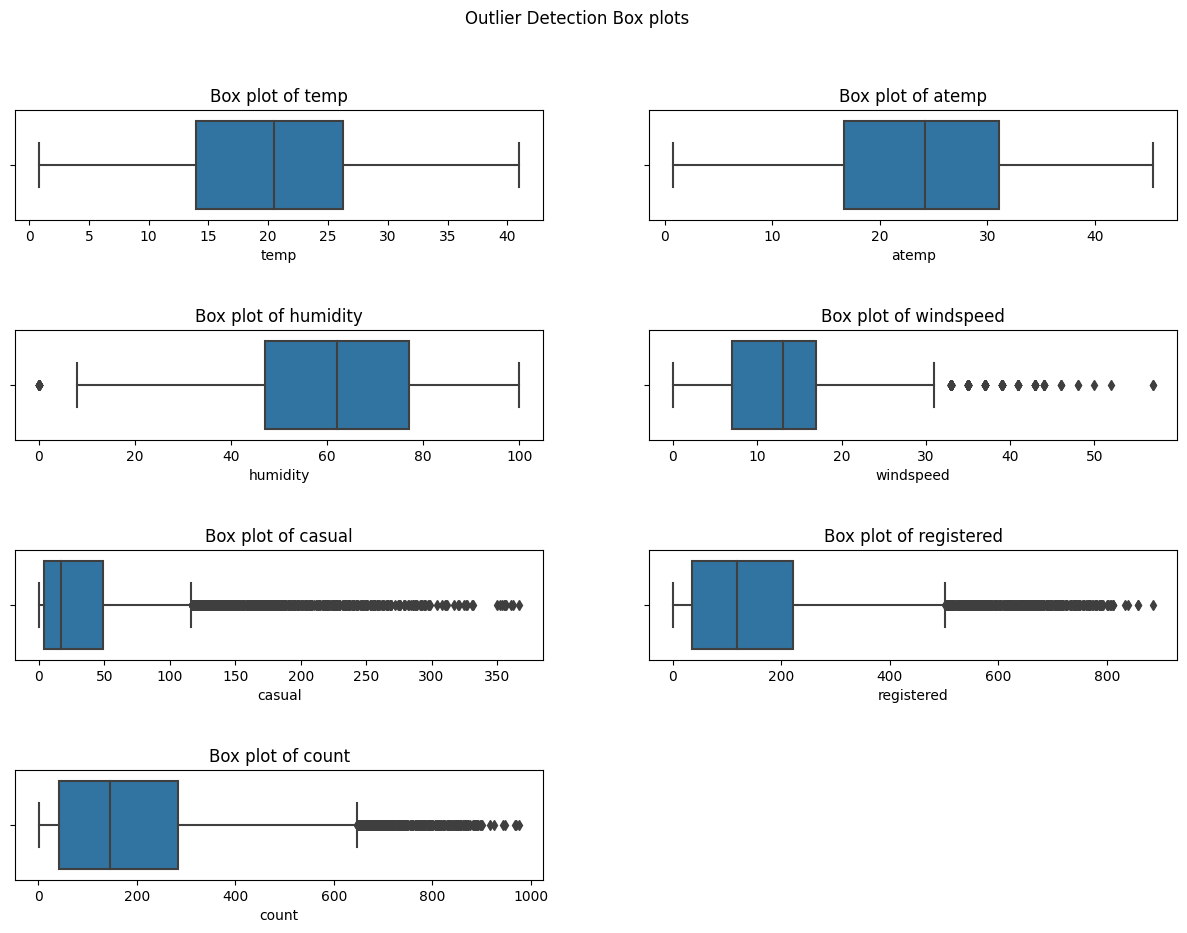

In [20]:
#Box plot for each numerical column
fig = plt.figure(figsize = (15,10))
plt.suptitle("Outlier Detection Box plots")
k = 1
for i in num_cols:
    plt.subplot(math.ceil(len(num_cols)/2),2,k)
    plt.title(f"Box plot of {i}")
    k += 1
    sns.boxplot(data=yulu, x = i,orient="h")
plt.subplots_adjust(hspace = 1)
plt.show()

Observations:

> Significant number of Outliers are present in `humidity, windspeed, casual, registered, count` columns

###Statistical way of outlier representation

In [21]:
#create a function to find outliers using IQR (Statistical way)
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    upper_whisker = q3+1.5*IQR
    lower_whisker = q1-1.5*IQR
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    print("number of outliers =", (len(outliers)))
    print("max outlier value =", (outliers.max()))
    print("min outlier value =", (outliers.min()))
    print("Inter Quartile range =",IQR)
    print("upper_whisker =", upper_whisker)
    print("lower whisker =", lower_whisker)
    print("\n")

In [22]:
for i in ["humidity","windspeed", "casual", "registered", "count"]:
    print(f"Outliers statistics of {i} column")
    find_outliers_IQR(yulu[i])

Outliers statistics of humidity column
number of outliers = 22
max outlier value = 0
min outlier value = 0
Inter Quartile range = 30.0
upper_whisker = 122.0
lower whisker = 2.0


Outliers statistics of windspeed column
number of outliers = 227
max outlier value = 56.9969
min outlier value = 32.9975
Inter Quartile range = 9.996400000000001
upper_whisker = 31.992500000000003
lower whisker = -7.993100000000002


Outliers statistics of casual column
number of outliers = 749
max outlier value = 367
min outlier value = 117
Inter Quartile range = 45.0
upper_whisker = 116.5
lower whisker = -63.5


Outliers statistics of registered column
number of outliers = 423
max outlier value = 886
min outlier value = 502
Inter Quartile range = 186.0
upper_whisker = 501.0
lower whisker = -243.0


Outliers statistics of count column
number of outliers = 300
max outlier value = 977
min outlier value = 648
Inter Quartile range = 242.0
upper_whisker = 647.0
lower whisker = -321.0




Observations:

> In humidity col, 22 outliers are observed, All outliers are having humidity = 0

> Difference between Max Oultier Value and Min Outlier Values is large value. and Number of ouliers are fairly large value. So bounding/deleting of outliers is not good. `Use the dataset without bounding the outliers`

> If lower whisker is negative value so It is equal to `zero`

#CHAPTER 3: NON GRAPHICAL AND VISUAL ANALYSIS

###Value Counts on categorical columns

In [23]:
for i in cat_cols:
    print("Number of bookings in {} column with respect to each of its category".format(i))
    print(yulu[i].value_counts(),end="\n\n")

Number of bookings in season column with respect to each of its category
4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

Number of bookings in holiday column with respect to each of its category
0    10575
1      311
Name: holiday, dtype: int64

Number of bookings in workingday column with respect to each of its category
1    7412
0    3474
Name: workingday, dtype: int64

Number of bookings in weather column with respect to each of its category
1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

Number of bookings in year column with respect to each of its category
2012    5464
2011    5422
Name: year, dtype: int64

Number of bookings in month column with respect to each of its category
5     912
6     912
7     912
8     912
12    912
10    911
11    911
4     909
9     909
2     901
3     901
1     884
Name: month, dtype: int64

Number of bookings in hour column with respect to each of its category
12    456
13    456
22    456
21    456
20    456

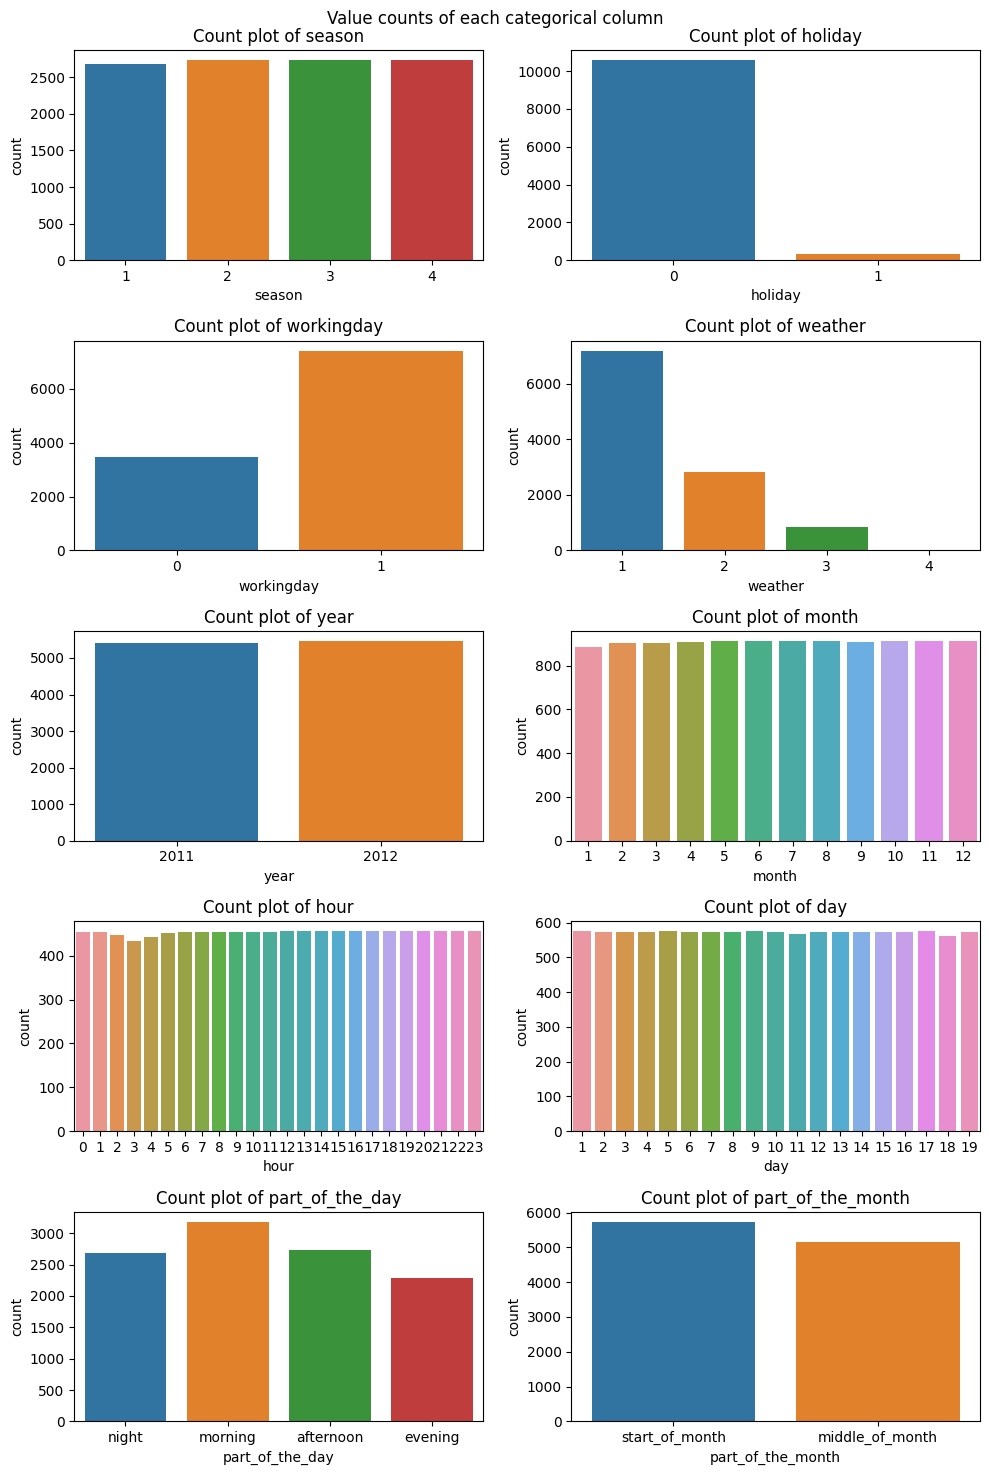

In [24]:
fig = plt.figure(figsize = (10,15))
plt.suptitle("Value counts of each categorical column")
k = 1
for i in cat_cols:
    plt.subplot(math.ceil(len(cat_cols)/2),2,k)
    plt.title(f"Count plot of {i}")
    k += 1
    sns.countplot(data=yulu, x = i)
plt.subplots_adjust(hspace = 0.5)
plt.tight_layout()
plt.show()

Observations:

> All `seasons share similar number of bookings`(around 2650 to 2750)

> `On holidays, Very very less number of bookings` are observed compared to on NON holiday bookings

> approx `1:2` behaviour observed between `NonWorkingday : workingday`

> from `Weather 1 to 4`, Bookings observed in `descending manner`.

> During `mornings` more number of bookings are observed.

> Data does not consists of `end of month data`

> Number of bookings are evenly distributed in year, month, day and hour

> Slightly higher number of bookings observed during `mornings and start of the month`

###Cross tab analysis

####On Categorical columns

Modified cat_cols

In [25]:
cat_cols= ['season', 'holiday', 'workingday', 'weather','year','part_of_the_day','part_of_the_month']

NC2 Combinations of all cat_cols

In [26]:
comb = list(combinations(cat_cols,2))
comb

[('season', 'holiday'),
 ('season', 'workingday'),
 ('season', 'weather'),
 ('season', 'year'),
 ('season', 'part_of_the_day'),
 ('season', 'part_of_the_month'),
 ('holiday', 'workingday'),
 ('holiday', 'weather'),
 ('holiday', 'year'),
 ('holiday', 'part_of_the_day'),
 ('holiday', 'part_of_the_month'),
 ('workingday', 'weather'),
 ('workingday', 'year'),
 ('workingday', 'part_of_the_day'),
 ('workingday', 'part_of_the_month'),
 ('weather', 'year'),
 ('weather', 'part_of_the_day'),
 ('weather', 'part_of_the_month'),
 ('year', 'part_of_the_day'),
 ('year', 'part_of_the_month'),
 ('part_of_the_day', 'part_of_the_month')]

NP2 permutations of all cat_cols

In [27]:
perm = list(permutations(cat_cols,2))
perm

[('season', 'holiday'),
 ('season', 'workingday'),
 ('season', 'weather'),
 ('season', 'year'),
 ('season', 'part_of_the_day'),
 ('season', 'part_of_the_month'),
 ('holiday', 'season'),
 ('holiday', 'workingday'),
 ('holiday', 'weather'),
 ('holiday', 'year'),
 ('holiday', 'part_of_the_day'),
 ('holiday', 'part_of_the_month'),
 ('workingday', 'season'),
 ('workingday', 'holiday'),
 ('workingday', 'weather'),
 ('workingday', 'year'),
 ('workingday', 'part_of_the_day'),
 ('workingday', 'part_of_the_month'),
 ('weather', 'season'),
 ('weather', 'holiday'),
 ('weather', 'workingday'),
 ('weather', 'year'),
 ('weather', 'part_of_the_day'),
 ('weather', 'part_of_the_month'),
 ('year', 'season'),
 ('year', 'holiday'),
 ('year', 'workingday'),
 ('year', 'weather'),
 ('year', 'part_of_the_day'),
 ('year', 'part_of_the_month'),
 ('part_of_the_day', 'season'),
 ('part_of_the_day', 'holiday'),
 ('part_of_the_day', 'workingday'),
 ('part_of_the_day', 'weather'),
 ('part_of_the_day', 'year'),
 ('par

In [28]:
for p,q in comb:
    print(f"cross tab between {p} and {q} with margins")
    print(pd.crosstab(index = yulu[p],columns = yulu[q],margins = True))
    print("\n")

cross tab between season and holiday with margins
holiday      0    1    All
season                    
1         2615   71   2686
2         2685   48   2733
3         2637   96   2733
4         2638   96   2734
All      10575  311  10886


cross tab between season and workingday with margins
workingday     0     1    All
season                       
1            858  1828   2686
2            840  1893   2733
3            888  1845   2733
4            888  1846   2734
All         3474  7412  10886


cross tab between season and weather with margins
weather     1     2    3  4    All
season                            
1        1759   715  211  1   2686
2        1801   708  224  0   2733
3        1930   604  199  0   2733
4        1702   807  225  0   2734
All      7192  2834  859  1  10886


cross tab between season and year with margins
year    2011  2012    All
season                   
1       1323  1363   2686
2       1367  1366   2733
3       1365  1368   2733
4       1367  1367  

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:416: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


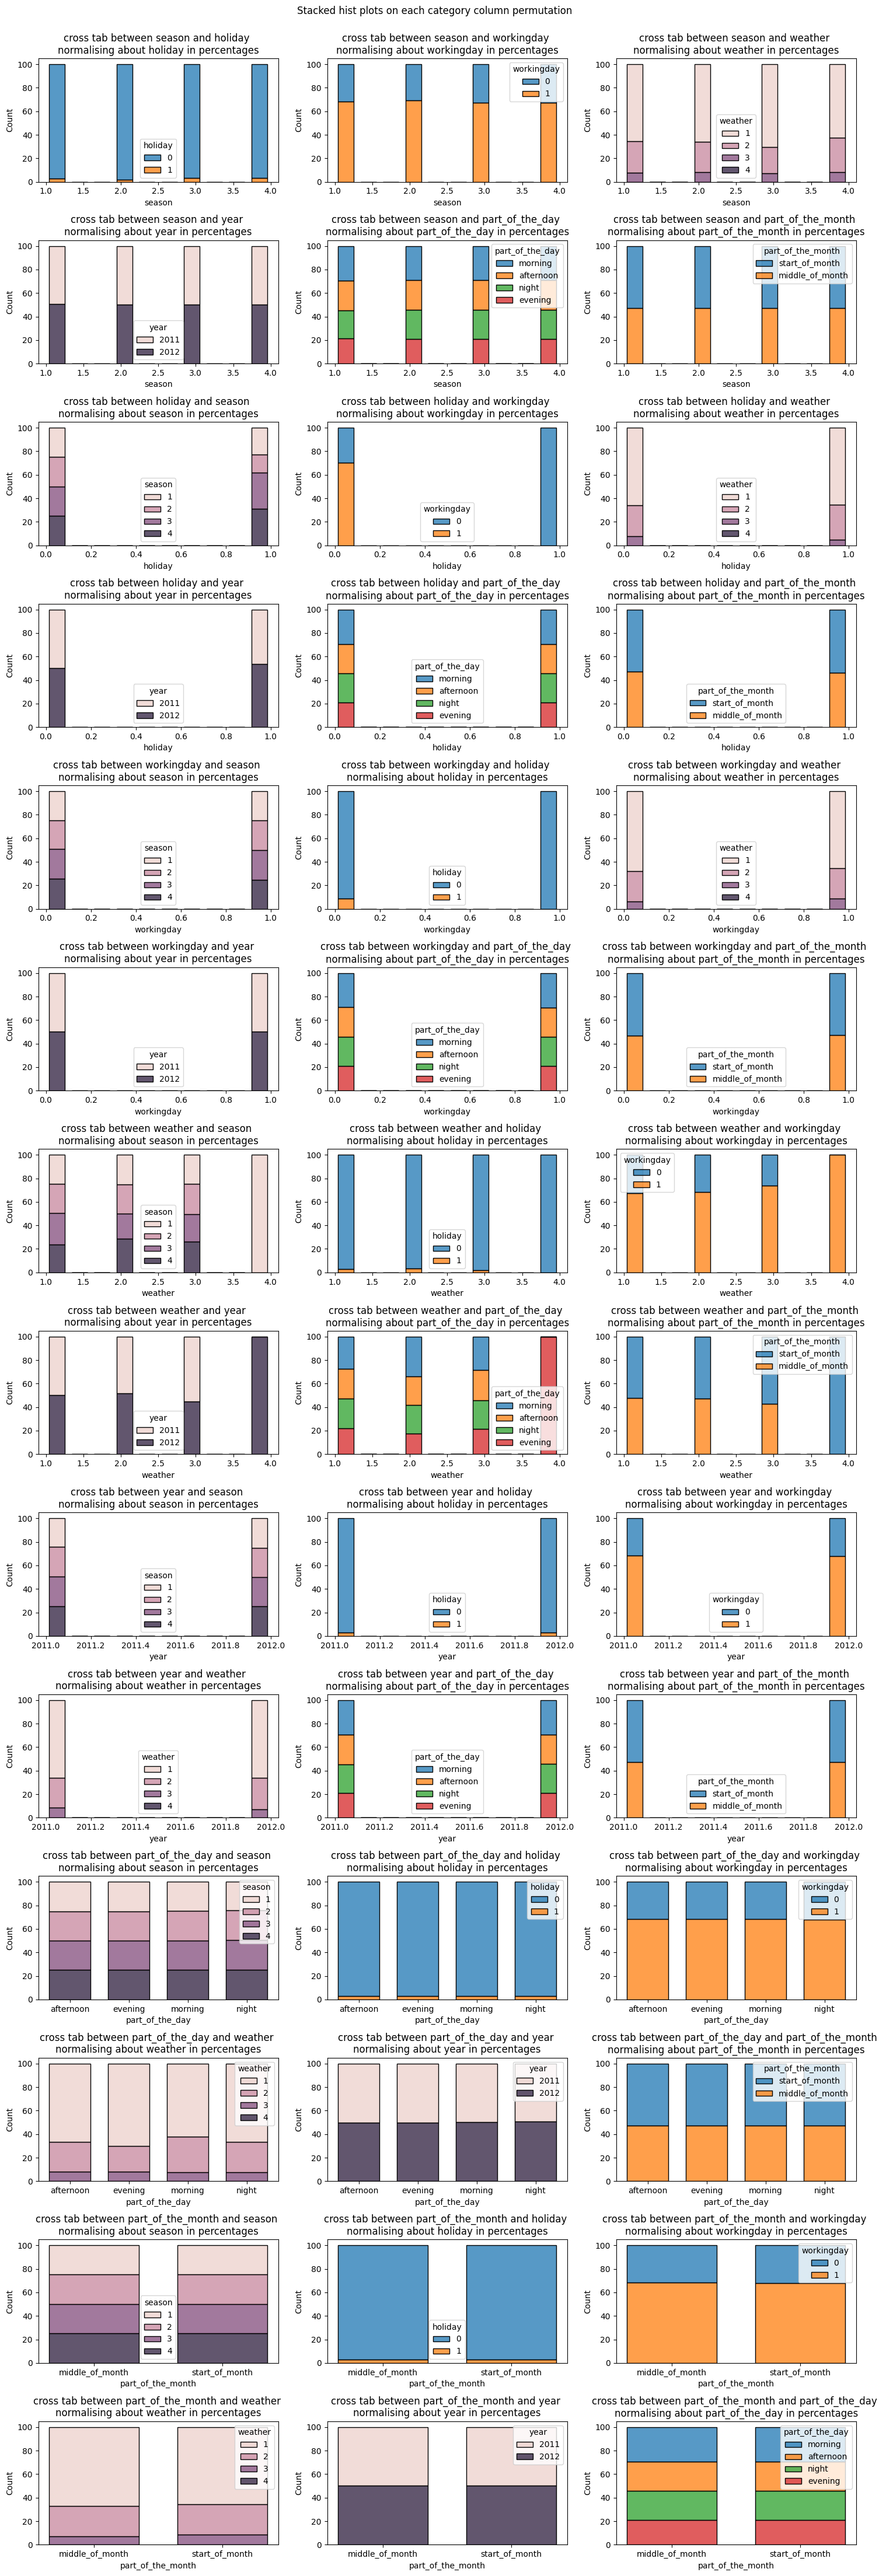

In [29]:
fig = plt.figure(figsize = (15,45))
plt.suptitle("Stacked hist plots on each category column permutation")
k = 1
for p,q in perm:
    plt.subplot(math.ceil(len(perm)/3),3,k)
    plt.title(f"cross tab between {p} and {q} \nnormalising about {q} in percentages")
    k += 1
    plot = yulu.groupby([p])[q].value_counts(normalize=True).mul(100).reset_index(name='percentage')
    sns.histplot(x = p , hue = q, weights= 'percentage',
                multiple = 'stack',data=plot,shrink = 0.7)
    warnings.filterwarnings('ignore')
plt.tight_layout()
plt.subplots_adjust(top=0.96)
plt.show()
warnings.filterwarnings('ignore')

Significant observations from above graphs:

> `workingday vs holiday` graph tells that `if it is working day, then 100% it is not holiday`

> `weather vs season` graph tells that `if weather = 4 (Heavy rains), then 100% it is season 1 (spring)`

> `weather vs holiday` graph tells that `if weather = 4 (Heavy rains), then 100% it is not holiday` i.e., No bookings on weather 4, holiday combination

> `weather vs workingday` graph tells that `if weather = 4 (Heavy rains), then 100% it is workingday` i.e., No bookings on weather 4, NonWorking day combination

####On Categorical Vs Numerical Columns

In [30]:
Cat_Vs_Num = []
for i in range(len(cat_cols)):
    for j in range(len(num_cols)):
        Cat_Vs_Num.append((cat_cols[i], num_cols[j]))
print(Cat_Vs_Num)
print(len(Cat_Vs_Num))

[('season', 'temp'), ('season', 'atemp'), ('season', 'humidity'), ('season', 'windspeed'), ('season', 'casual'), ('season', 'registered'), ('season', 'count'), ('holiday', 'temp'), ('holiday', 'atemp'), ('holiday', 'humidity'), ('holiday', 'windspeed'), ('holiday', 'casual'), ('holiday', 'registered'), ('holiday', 'count'), ('workingday', 'temp'), ('workingday', 'atemp'), ('workingday', 'humidity'), ('workingday', 'windspeed'), ('workingday', 'casual'), ('workingday', 'registered'), ('workingday', 'count'), ('weather', 'temp'), ('weather', 'atemp'), ('weather', 'humidity'), ('weather', 'windspeed'), ('weather', 'casual'), ('weather', 'registered'), ('weather', 'count'), ('year', 'temp'), ('year', 'atemp'), ('year', 'humidity'), ('year', 'windspeed'), ('year', 'casual'), ('year', 'registered'), ('year', 'count'), ('part_of_the_day', 'temp'), ('part_of_the_day', 'atemp'), ('part_of_the_day', 'humidity'), ('part_of_the_day', 'windspeed'), ('part_of_the_day', 'casual'), ('part_of_the_day',

In [31]:
for p,q in Cat_Vs_Num:
    df = pd.DataFrame(yulu.groupby([p])[[q]].mean())
    print(f"Mean values of {q} with respect to {p} categories")
    print(df)
    print()

Mean values of temp with respect to season categories
             temp
season           
1       12.530491
2       22.823483
3       28.789111
4       16.649239

Mean values of atemp with respect to season categories
            atemp
season           
1       15.228956
2       26.647098
3       32.540783
4       20.059909

Mean values of humidity with respect to season categories
         humidity
season           
1       56.297841
2       60.852909
3       64.123674
4       66.173738

Mean values of windspeed with respect to season categories
        windspeed
season           
1       14.636978
2       13.405607
3       11.508862
4       11.678147

Mean values of casual with respect to season categories
           casual
season           
1       15.489576
2       47.446762
3       52.220271
4       28.580834

Mean values of registered with respect to season categories
        registered
season            
1       100.853686
2       167.804610
3       182.196853
4       170.407462

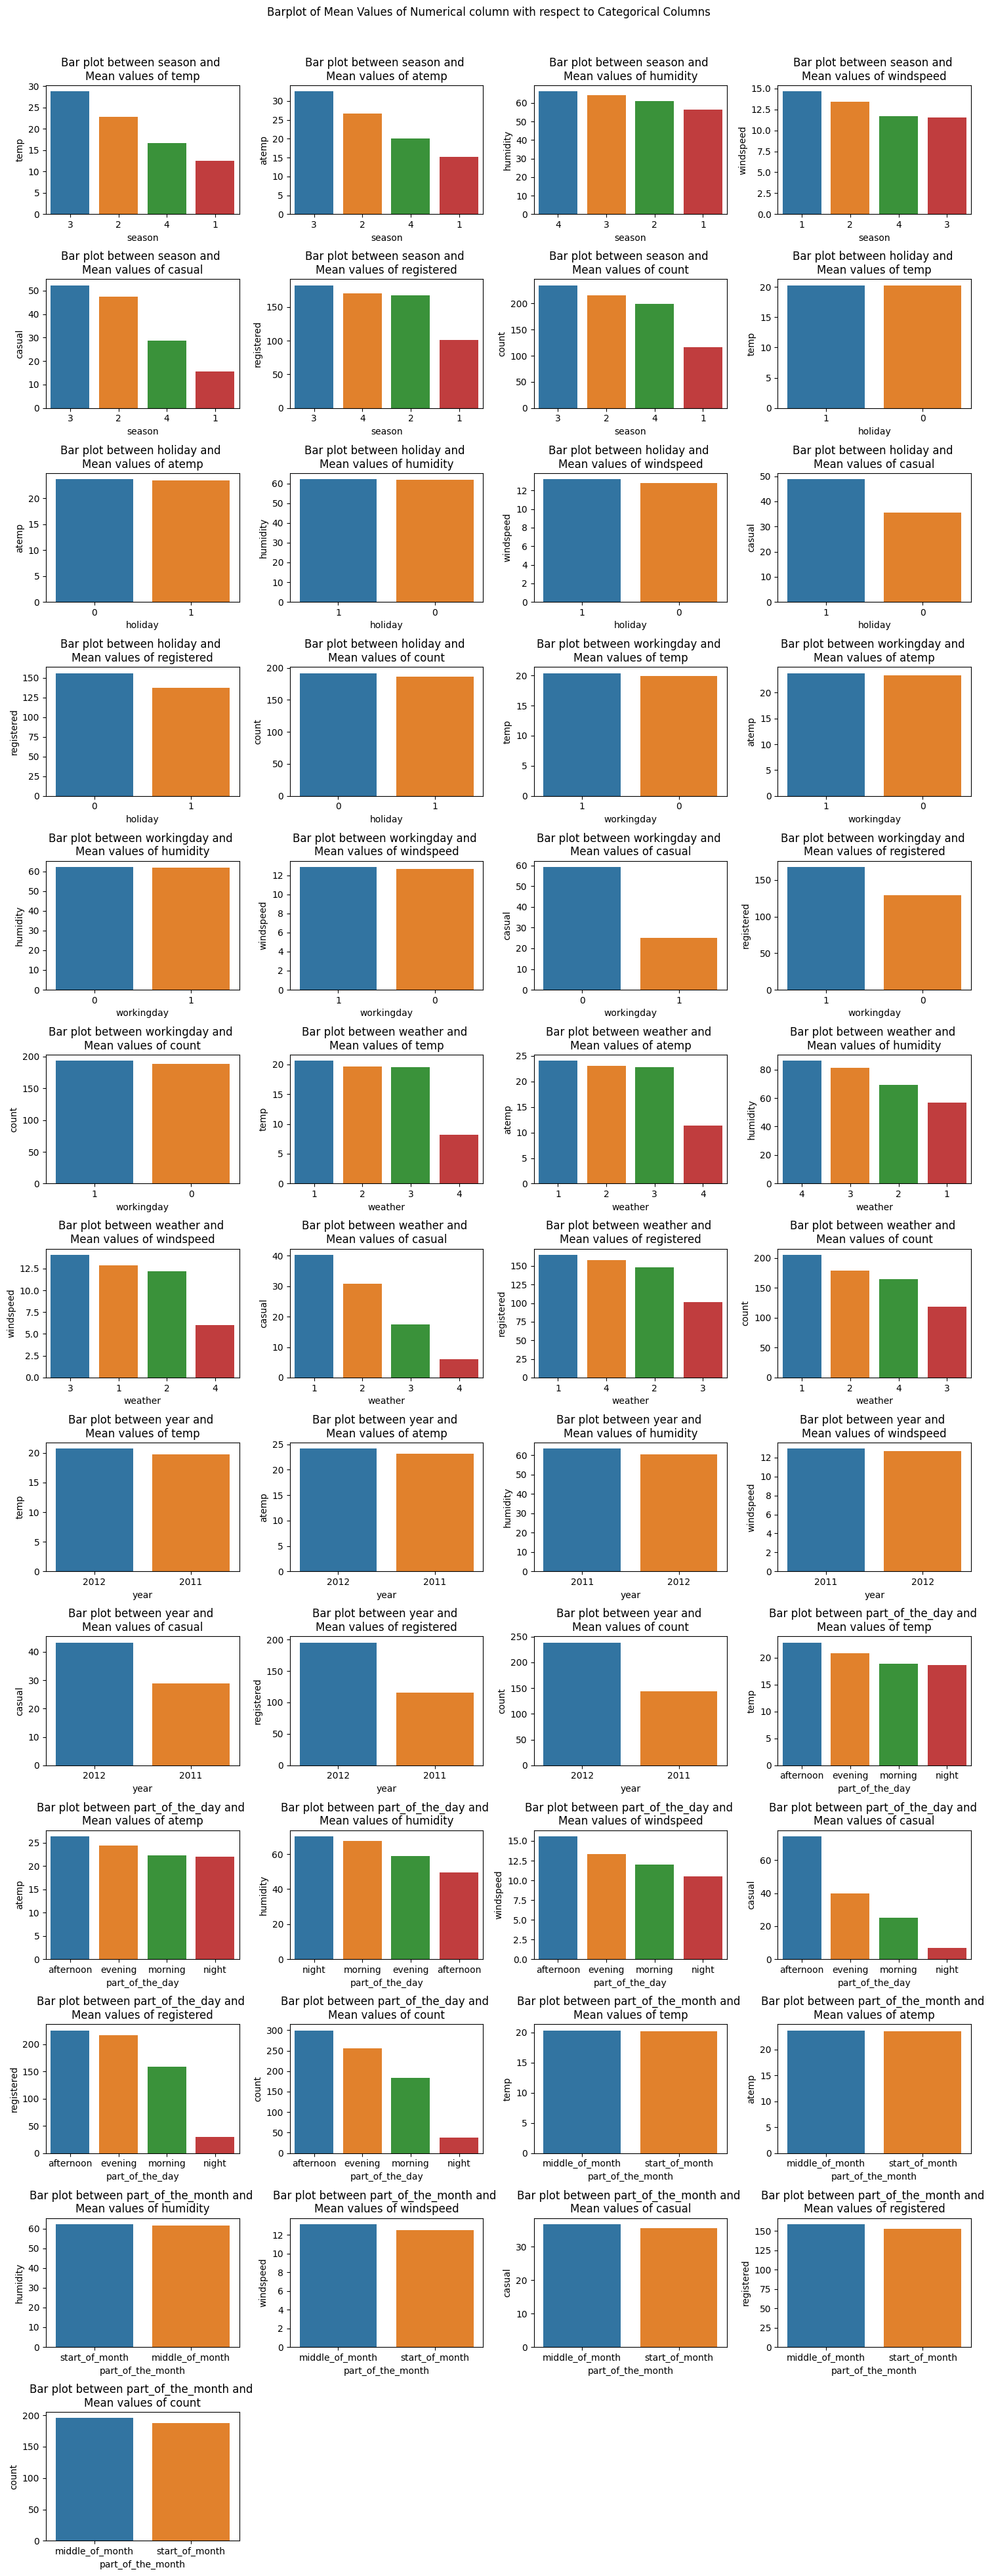

In [32]:
fig = plt.figure(figsize = (15,40))
plt.suptitle("Barplot of Mean Values of Numerical column with respect to Categorical Columns")
k = 1
for p,q in Cat_Vs_Num:
    plt.subplot(math.ceil(len(Cat_Vs_Num)/4),4,k)
    plt.title(f"Bar plot between {p} and \nMean values of {q}")
    k += 1
    df = pd.DataFrame(yulu.groupby([p])[[q]].mean().reset_index())
    sns.barplot(data = df,x = p,y= q,order = df.sort_values(q,ascending = False)[p])
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()
warnings.filterwarnings('ignore')

Observations:

> Season 3 ("fall") has `high temp and atemp` comparitively

> Season 3 ("fall") has `high number of bookings in casual, registered and count` comparitively

> Season 4 ("winter") has `high humidity` comparitively

> Season 1 ("spring") has `high windspeed` comparitively

> No relation between (temp, atemp, humidity, windspeed) vs (holiday, workingday. (similar mean values observed)

> Mean Casual bookings are higher on holidays and Non-Workingdays

> Mean registered bookings are higher on Non-Holidays and Workingdays

> Weather 1 ("Clear sky") has `high temp and atemp` comparitively

> Weather 4 ("Heavy Rains") has `high humidity` comparitively

> Weather 3 ("light rains") has `high windspeed` comparitively

> Weather 1 ("clear sky") has `high number of bookings in casual, registered and count` comparitively

> 2012 year registered slightly higher humidity and temperatures compared to 2011

> 2012 year registered higher bookings in `casual, registered and count` column compared to 2011

> During `afternoons` higher temp and windspeed observed. Higher bookings are also observed in `casual, registered and count` columns

> During `night` higher humidity observed

> start of the month and middle of the month has similar behaviour in all aspects.

###Heatmap and pairplot

<Axes: >

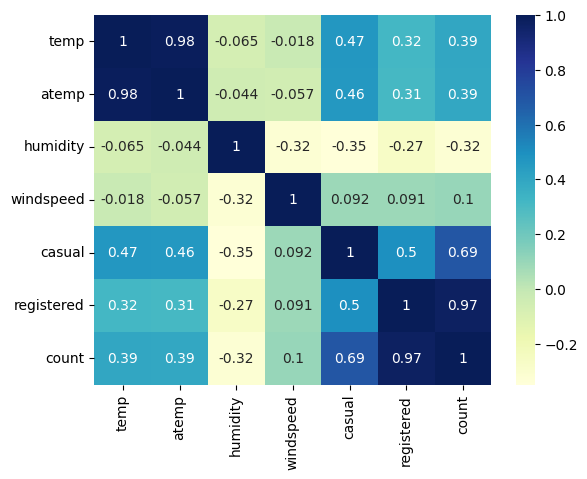

In [33]:
sns.heatmap(yulu.corr(), cmap="YlGnBu", annot=True)

Observations:

> 0.97 correlation observed between count and registered columns

> 0.5 correlation observed between casual and registered columns

> 0.69 correlation observed between casual and count

> negative correlation observed between humidity and (count,registered, casual, windspeed, temp)

> windspeed and temp is also negatively correlated

> 0.98 correlation observed between temp and atemp

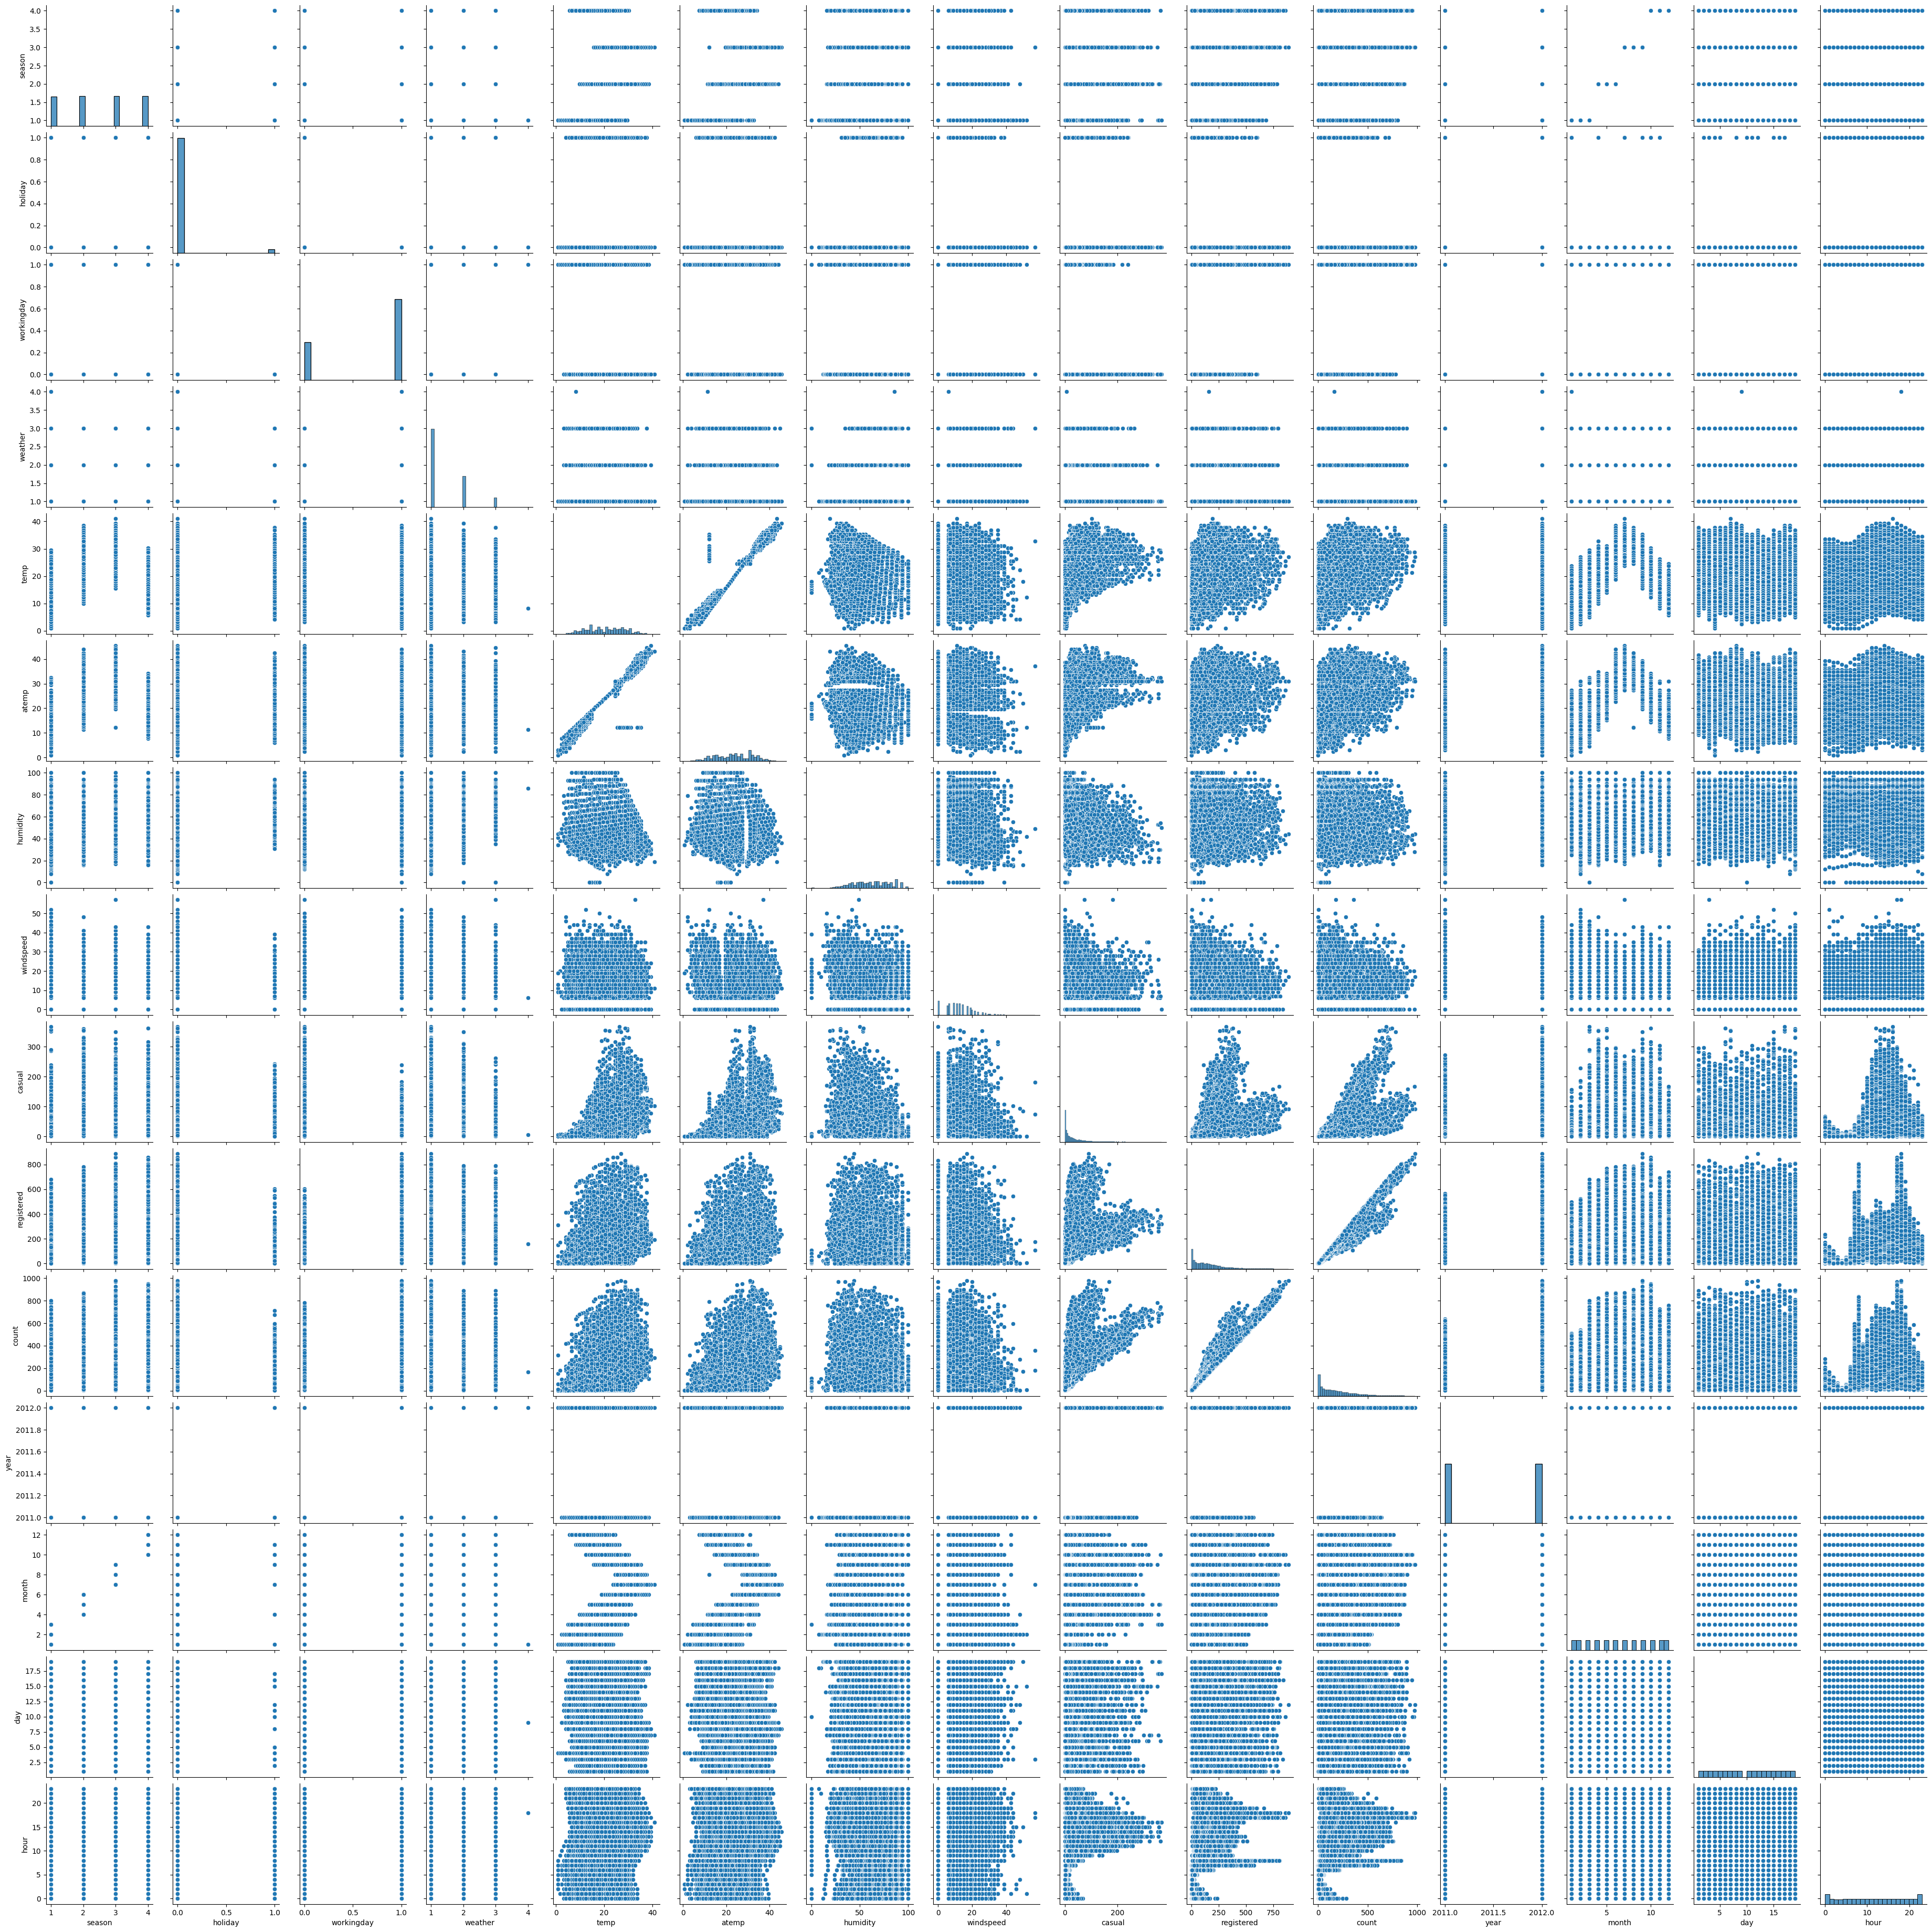

In [34]:
sns.pairplot(yulu)

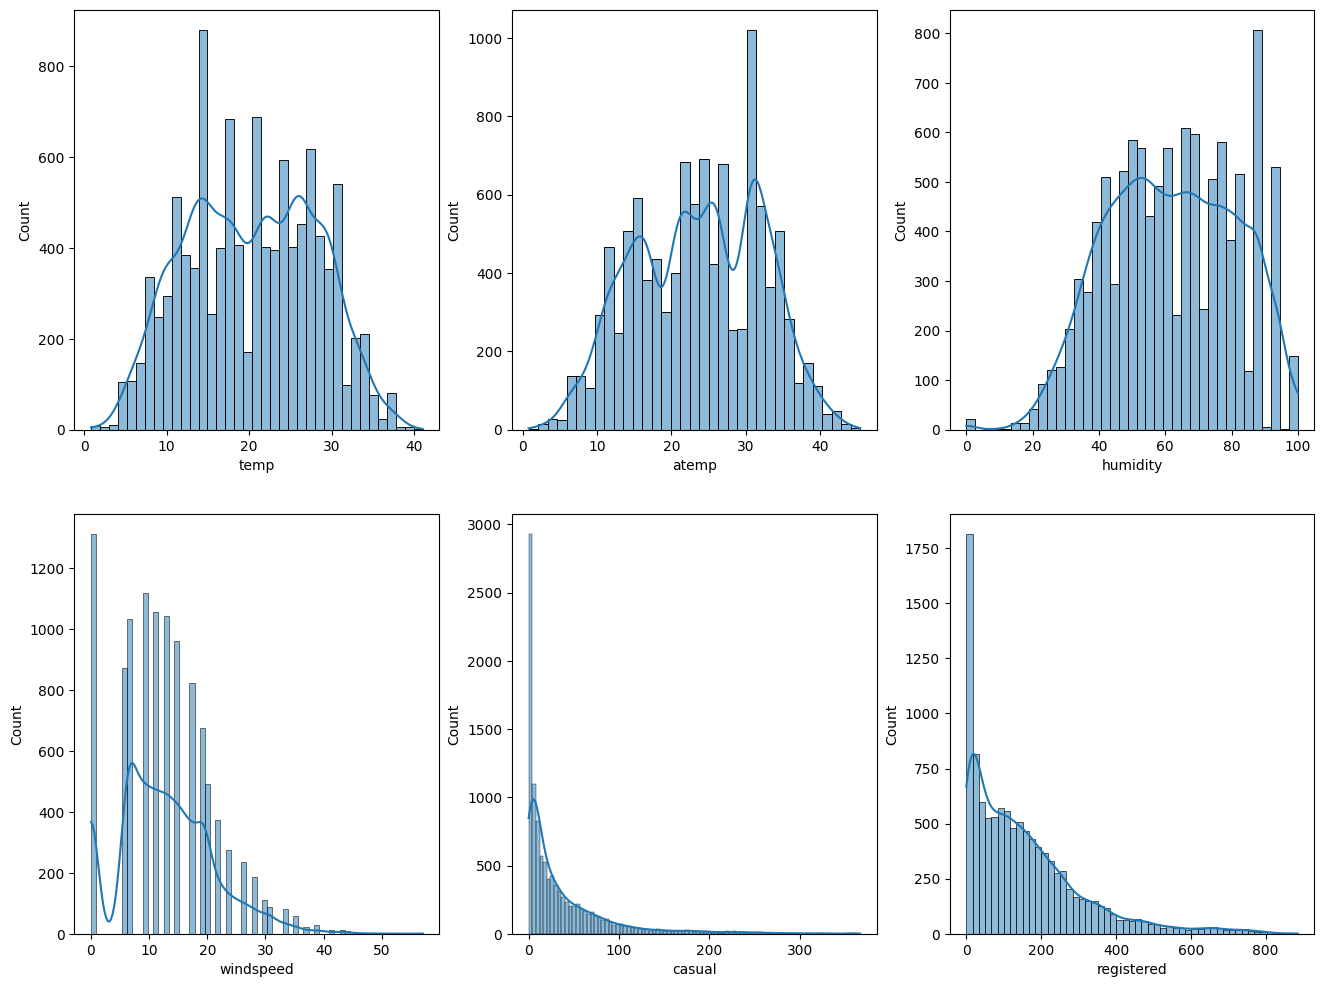

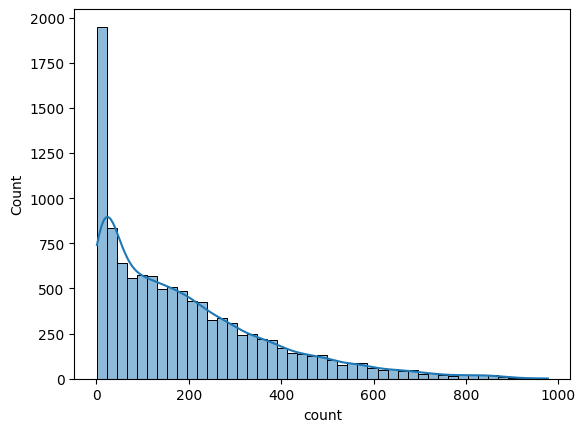

In [35]:
# understanding the distribution for numerical variables
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))
index = 0
for row in range(2):
    for col in range(3):
        sns.histplot(yulu[num_cols[index]], ax=axis[row, col], kde=True)
        index += 1
plt.show()
sns.histplot(yulu[num_cols[-1]], kde=True) 
plt.show()

Observations:

> casual, registered and count somewhat looks like Log Normal Distribution

> temp, atemp and humidity looks like they follows the Normal Distribution

> windspeed follows the binomial distribution

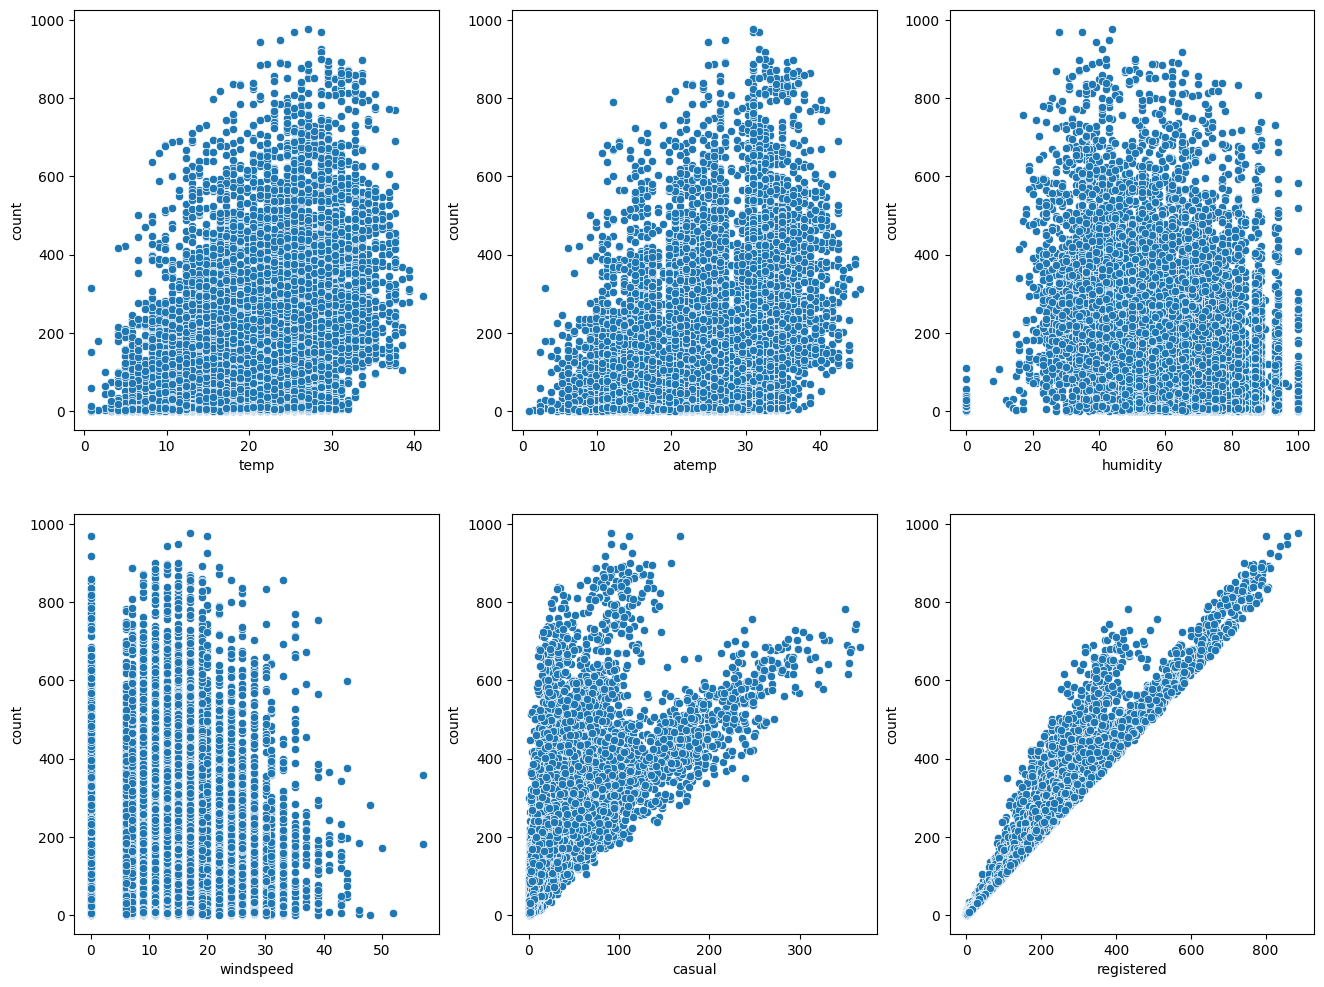

In [36]:
# plotting numerical variables againt count using scatterplot
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.scatterplot(data=yulu, x=num_cols[index], y='count', ax=axis[row, col])
        index += 1
        
plt.show()

Observations:

> Whenever the humidity is less than 20, number of bikes rented is very very low.

> Whenever the temperature is less than 10, number of bikes rented is less.

> Whenever the windspeed is greater than 35, number of bikes rented is less.

#CHAPTER 4: HYPOTHESIS TESTING

##**T-Test**

###Does Working Day has an effect on the number of electric cycles rented? (2_sample T_Test)

####Visual analysis

<Axes: xlabel='workingday', ylabel='count'>

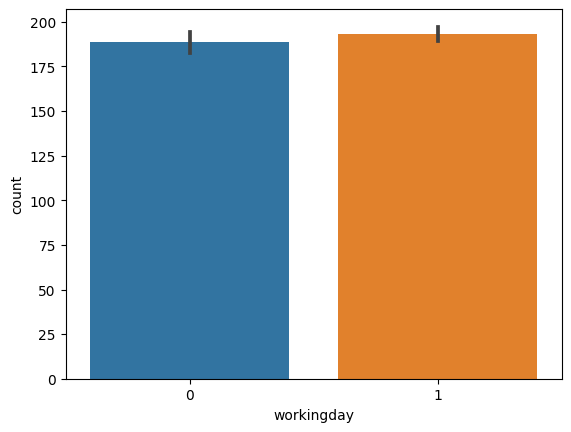

In [37]:
sns.barplot(data = yulu, x = "workingday",y = "count")

Graph indicates that there is no much difference between working day and non working day

####Hypothesis formulation

> Null Hypothesis H0: Working day has no effect on the number of cycles being rented 
\begin{align}
\mu_{workingday} = \mu_{non-workingday}
\end{align}

> Alternate Hypothesis Ha: Working day has effect on the number of cycles being rented
\begin{align}
\mu_{workingday} \ne \mu_{non-workingday}
\end{align}

> two-tailed test

> Significance level: 0.05

In [51]:
alpha = 0.05

####Selection of appropriate test

> `workingday` is categorical column with two categories - 0 and 1 ( Non working day and working day). `count` column is providing number of cycles rented totally. `count` is numerical column.

> So here two independent samples are tested based on number of cycles rented. 

> ttest comparing means of two independent samples is required so `ttest_ind` is appropriate

####Check the test assumptions

The two-samples independent t-test assume the following characteristics about the data:

> `Independence of the observations`- Each subject should belong to only one group. There is no relationship between the observations in each group.

> `No significant outliers` in the two groups

> `Normality`- the data for each group should be approximately normally distributed.

> `Homogeneity of variances`- the variance of the outcome variable should be equal in each group.

In [58]:
# independence of observations and homogeneity of variances
data_group1 = yulu[yulu['workingday']==0]['count'].values
data_group2 = yulu[yulu['workingday']==1]['count'].values

print("variance of non-workingday rented cycles",np.var(data_group1),"\nvariance of workingday rented cycles", np.var(data_group2))

variance of non-workingday rented cycles 30171.346098942427 
variance of workingday rented cycles 34040.69710674686


Both data groups are independent (during masking, RHS value are different (0 and 1) )

Before conducting the two-sample T-Test we need to find if the given data groups have the same variance. If the ratio of the larger data groups to the small data group is less than 4:1 then we can consider that the given data groups have equal variance.

Here, the ratio is 34040.70 / 30171.35 which is less than 4:1

`Shapiro test`

In [76]:
#Normality by shapiro test
shapiro(data_group1)

ShapiroResult(statistic=0.8852126598358154, pvalue=4.203895392974451e-45)

In [77]:
shapiro(data_group2)

ShapiroResult(statistic=0.8702582120895386, pvalue=0.0)

<Axes: ylabel='Count'>

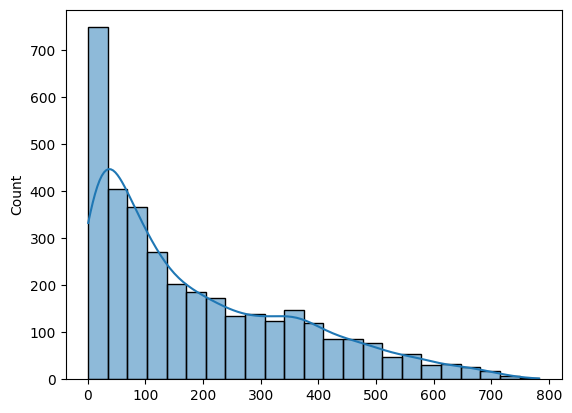

In [78]:
sns.histplot(data = data_group1,kde = True)

<Axes: ylabel='Count'>

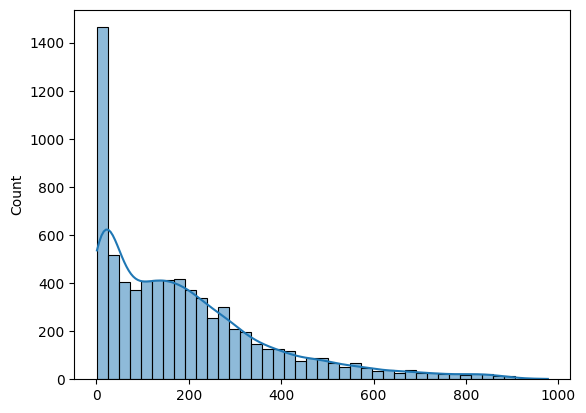

In [79]:
sns.histplot(data = data_group2,kde = True)

Above graph and shapiro test tells that data groups are not following NORMAL distribution

<Axes: >

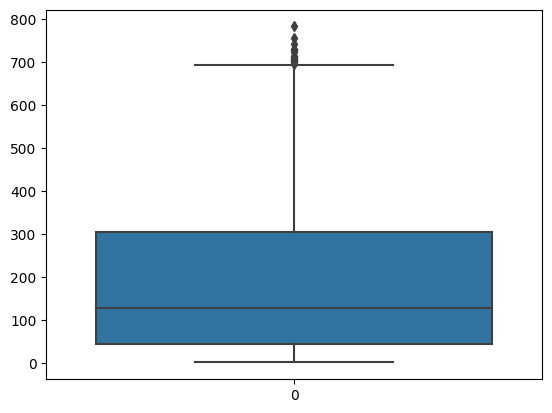

In [80]:
sns.boxplot(data_group1)

<Axes: >

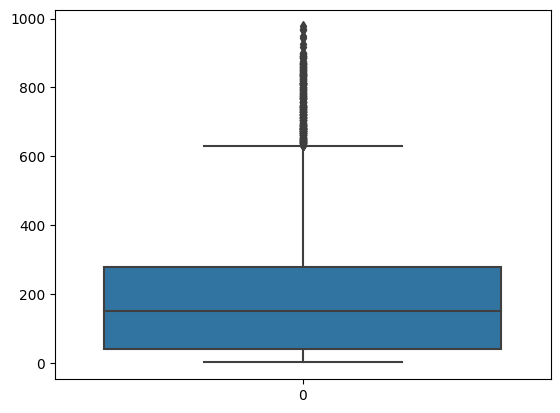

In [81]:
sns.boxplot(data_group2)

Significant number of outliers are present in both box plots

####Finding the p-value

In [52]:
tstat,p_val = ttest_ind(a=data_group1, b=data_group2, equal_var=True,alternative = "two-sided")

In [53]:
print("test statistic",tstat)
print("p value",p_val)

test statistic -1.2096277376026694
p value 0.22644804226361348


####Conclusion based on the p-value

In [55]:
if p_val <= alpha:
    print("\nSince p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning that\
    working day has effect on number of cycles being rented.")
else:
    print("Since p-value is greater than the alpha 0.05, We do not reject the Null Hypothesis\
    i.e, working day has no effect on number of cycles being rented")

Since p-value is greater than the alpha 0.05, We do not reject the Null Hypothesis    i.e, working day has no effect on number of cycles being rented


Since pvalue is greater than 0.05 so we can not reject the Null hypothesis. We don't have the sufficient evidence to say that working day has effect on the number of cycles being rented.

##**ANNOVA**

###Does Number of cycles rented is similar or different in different weather?

####Visual analysis

<Axes: xlabel='weather', ylabel='count'>

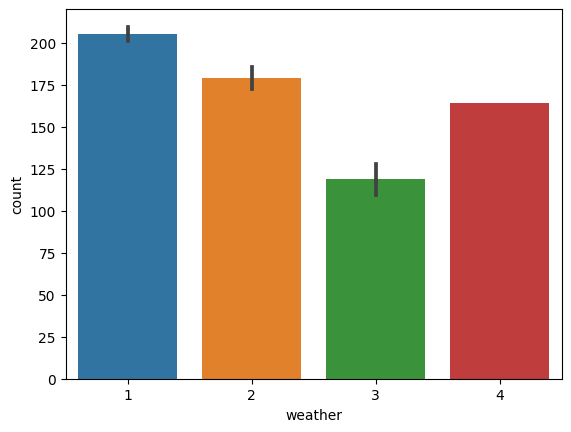

In [99]:
sns.barplot(data = yulu, x = "weather",y = "count")

Using above graph, It is not possible to decide whether there is any similarity in all weathers or not

####Hypothesis formulation

> Null Hypothesis H0: Number of cycles rented is similar in different weather
\begin{align}
\mu_{weather1} = \mu_{weather2} = \mu_{weather3} = \mu_{weather4}
\end{align}

> Alternate Hypothesis Ha: Number of cycles rented is not similar in different weather(atleast one of the groups means differ)

> Significance level (alpha): 0.05

In [95]:
alpha = 0.05

####Check the test assumptions

> Population distributions are normal

> Samples have equal variances

> Independent groups

In [100]:
# defining the data groups for different weathers and seasons
gp1 = yulu[yulu['weather']==1]['count'].values
gp2 = yulu[yulu['weather']==2]['count'].values
gp3 = yulu[yulu['weather']==3]['count'].values
gp4 = yulu[yulu['weather']==4]['count'].values

All groups are independent

<Figure size 1000x1500 with 0 Axes>

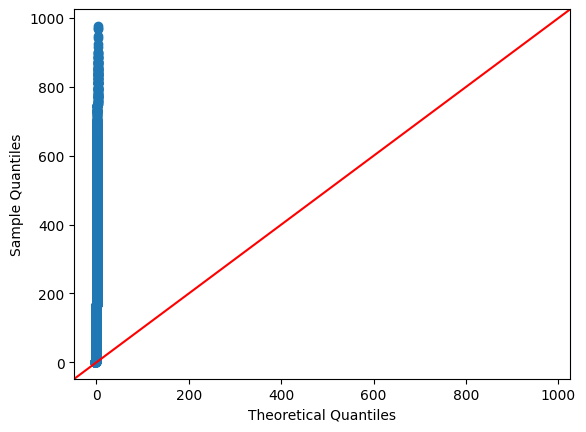

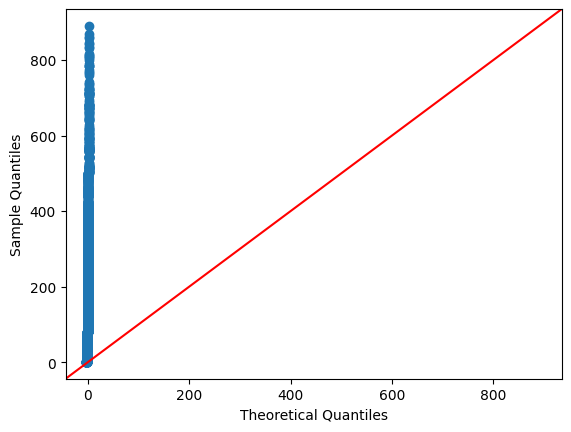

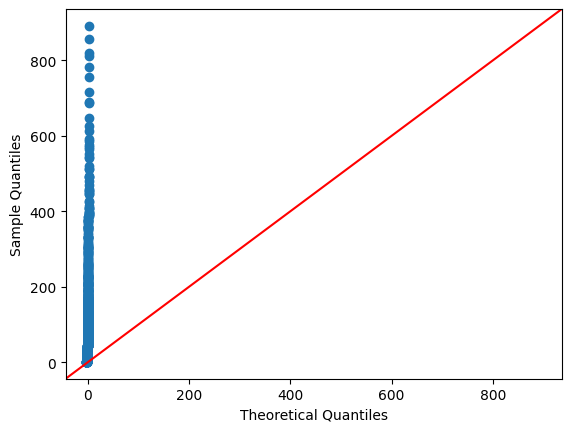

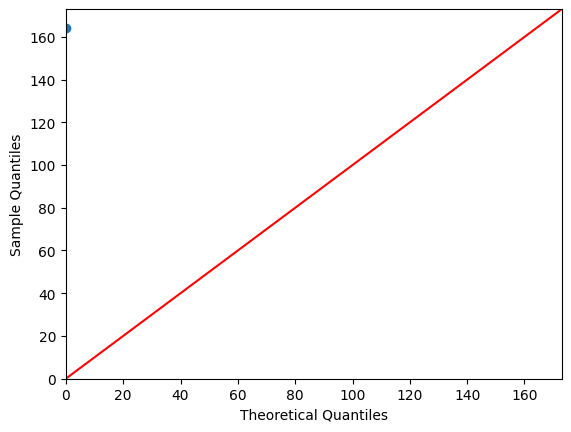

In [101]:
fig = plt.figure(figsize = (10,15))
plt.suptitle("Normality tests by QQ plots of each groups")
k = 1
for i in [gp1,gp2,gp3,gp4]:
    sm.qqplot(i,line = "45")
plt.show()

Above QQplots showing that all groups are not following normal distribution

In [102]:
# homogeneity of variances
k = 1
for i in [gp1,gp2,gp3,gp4]:
    print(f"variance of group{k}",np.var(i))
    k += 1

variance of group1 35323.8862270764
variance of group2 28337.246435435423
variance of group3 19182.418761290777
variance of group4 0.0


Variances of all groups are not similar

####Selection of appropriate test

f_oneway ANOVA is not suitable for above hypothesis because above assumptions are not satisfied. So kruskal test is suitable

####Finding the p-value

In [111]:
fstat, p_val = kruskal(gp1, gp2, gp3, gp4)

In [112]:
print("f statistic:",fstat)
print("p value:",p_val)

f statistic: 205.00216514479087
p value: 3.501611300708679e-44


####Conclusion based on the p-value

In [114]:
if p_val <= alpha:
    print("\nSince p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning that\
    Number of cycles rented is not similar in different weather.")
else:
    print("Since p-value is greater than the alpha 0.05, We do not reject the Null Hypothesis\
    i.e, Number of cycles rented is similar in different weather")


Since p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning that    Number of cycles rented is not similar in different weather.


Since p-value is less than 0.05, we reject the null hypothesis. This implies that Number of cycles rented is not similar in different weather and season conditions

###Does Number of cycles rented is similar or different in different season?

####Visual analysis

<Axes: xlabel='season', ylabel='count'>

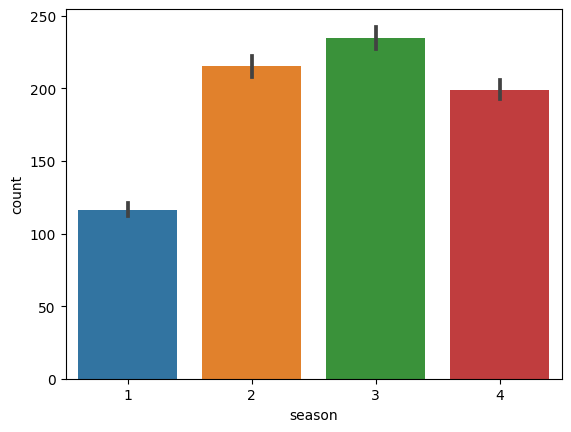

In [115]:
sns.barplot(data = yulu, x = "season",y = "count")

Using above graph, It is not possible to decide whether season effect number of cycles rented or not

####Hypothesis formulation

> Null Hypothesis H0: Number of cycles rented is similar in different season
\begin{align}
\mu_{season1} = \mu_{season2} = \mu_{season3} = \mu_{season4}
\end{align}

> Alternate Hypothesis Ha: Number of cycles rented is not similar in different season (atleast one of the groups means differ)

> Significance level (alpha): 0.05

In [ ]:
alpha = 0.05

####Check the test assumptions

> Population distributions are normal

> Samples have equal variances

> Independence

In [116]:
# defining the data groups for different weathers and seasons
gp5 = yulu[yulu['season']==1]['count'].values
gp6 = yulu[yulu['season']==2]['count'].values
gp7 = yulu[yulu['season']==3]['count'].values
gp8 = yulu[yulu['season']==4]['count'].values

All groups are independent

<Figure size 1000x1500 with 0 Axes>

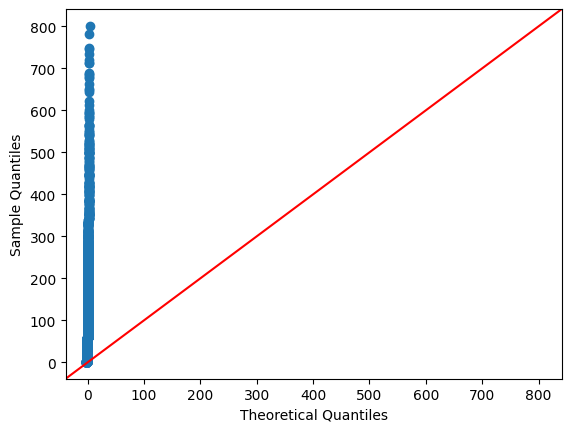

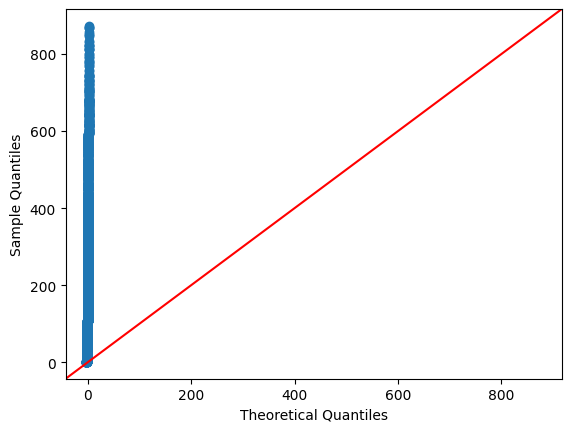

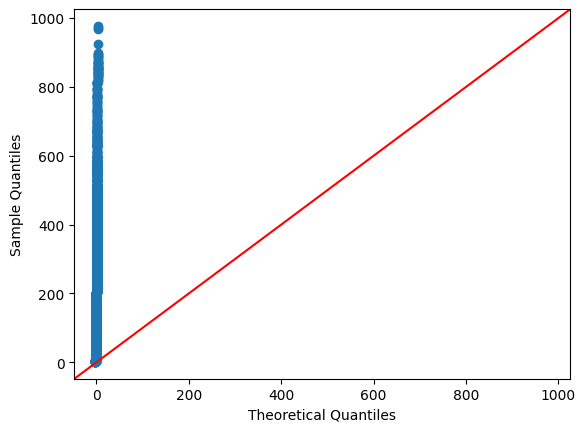

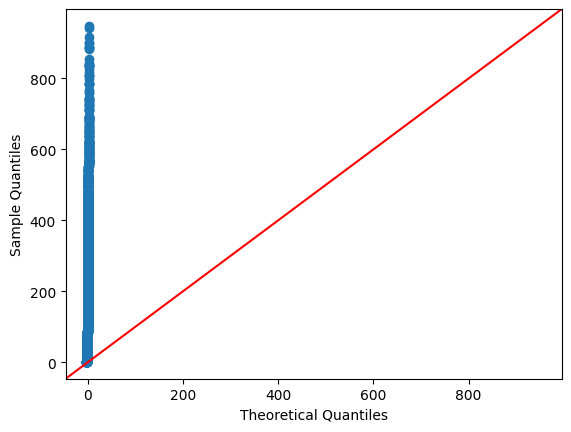

In [117]:
fig = plt.figure(figsize = (10,15))
plt.suptitle("Normality tests by QQ plots of each groups")
k = 1
for i in [gp5,gp6,gp7,gp8]:
    sm.qqplot(i,line = "45")
plt.show()

Above QQplots showing that all groups are not following normal distribution

In [118]:
# independence of observations and homogeneity of variances
k = 1
for i in [gp5,gp6,gp7,gp8]:
    print(f"variance of group{k}",np.var(i))
    k += 1

variance of group1 15687.725805298038
variance of group2 36853.522249306465
variance of group3 38854.295089130974
variance of group4 31538.180550642726


Variances of all groups are not similar

####Selection of appropriate test

f_oneway ANOVA is not suitable for above hypothesis because above assumptions are not satisfied. So kruskal test is suitable.

####Finding the p-value

In [120]:
fstat, p_val = kruskal(gp5, gp6, gp7, gp8)

In [121]:
print("f statistic:",fstat)
print("p value:",p_val)

f statistic: 699.6668548181988
p value: 2.479008372608633e-151


####Conclusion based on the p-value

In [123]:
if p_val <= alpha:
    print("\nSince p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning that\
    Number of cycles rented is not similar in different season.")
else:
    print("Since p-value is greater than the alpha 0.05, We do not reject the Null Hypothesis\
    i.e, Number of cycles rented is similar in different season")


Since p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning that    Number of cycles rented is not similar in different season.


Since p-value is less than 0.05, we reject the null hypothesis. This implies that Number of cycles rented is not similar in different weather and season conditions

##**Chi-Square Test**

###Does weather is dependent on the season?

####Visual analysis

<Axes: xlabel='season', ylabel='count'>

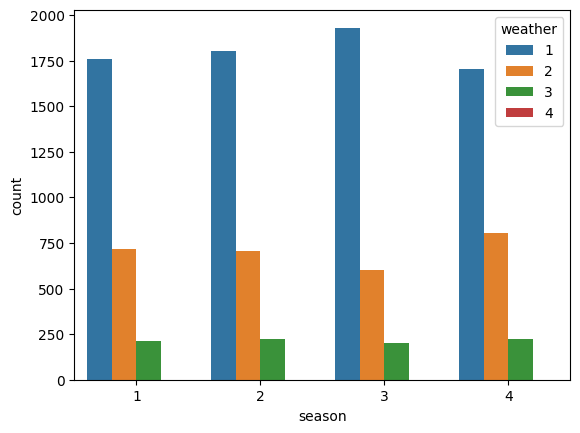

In [43]:
sns.countplot(data = yulu,x = "season", hue = "weather")

####Hypothesis formulation

> Null Hypothesis H0: Weather and Season are independent to each other

> Alternate Hypothesis Ha: Weather and Season are dependent to each other.

> Significance level = 0.05

####Selection of appropriate test

In [44]:
print("data type of weather is",yulu["weather"].dtype)
print("data type of season is",yulu["season"].dtype)

data type of weather is object
data type of season is object


> As both weather and season are object datatype i.e., categorical columns. `Chi square test of independence` should be done to check dependency between two columns

> Test Statistic of Chi square test
\begin{align}
\chi^2 = \sum_{i,j} \frac{(O_{i,j}-E_{i,j})^2}{E_{i,j}}.
\end{align}

> $O_{i,j}$ is the observed count

> $E_{i,j}$ is the expected count

> degrees of freedom calculated using (number of rows - 1) * (number of columns - 1) in contingency table

####Check the test assumptions

Assumptions of chi square test are:

> Both variables are categorical (already verified - weather and season are categorical variables)

> Cells in contingency table are mutually exclusive

> Expected value of cells should be 5 or greater in atleast 80% of cells

In [175]:
data_table_without_margins = pd.crosstab(yulu['season'], yulu['weather'])
print("Observed values:")
data_table_without_margins

Observed values:


weather     1    2    3  4
season                    
1        1759  715  211  1
2        1801  708  224  0
3        1930  604  199  0
4        1702  807  225  0

In [176]:
data_table = pd.crosstab(yulu['season'], yulu['weather'],margins = True,margins_name = "Total")
print("Observed values:")
data_table

Observed values:


weather     1     2    3  4  Total
season                            
1        1759   715  211  1   2686
2        1801   708  224  0   2733
3        1930   604  199  0   2733
4        1702   807  225  0   2734
Total    7192  2834  859  1  10886

In [148]:
df = data_table.reset_index()

In [164]:
#expected_values
np_expected_values = np.empty([4,4],float)

In [165]:
expected_values = pd.DataFrame(np_expected_values)

In [167]:
for i in range(4):
    for j in range(4):
        expected_values[i][j] = (df["Total"][i]*df[i+1][4])/(df["Total"][4])

In [170]:
expected_values = np.array(expected_values)

####Finding the p-value

In [180]:
nrows, ncols = 4, 4
dof = (nrows-1)*(ncols-1)
print("degrees of freedom: ", dof)
alpha = 0.05


chi_sqr = sum([(o-e)**2/e for o, e in zip(data_table_without_margins.values, expected_values)])
chi_sqr_statistic = chi_sqr[0] + chi_sqr[1]
print("chi-square test statistic: ", chi_sqr_statistic)

critical_val = chi2.ppf(q=1-alpha, df=dof)
print(f"critical value: {critical_val}")

p_val = chi2.cdf(x=chi_sqr_statistic, df=dof)
print(f"p-value: {p_val}")

if p_val <= alpha:
    print("\nSince p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning that\
    Weather is dependent on the season.")
else:
    print("Since p-value is greater than the alpha 0.05, We do not reject the Null Hypothesis")

degrees of freedom:  9
chi-square test statistic:  46.20930897015438
critical value: 16.918977604620448
p-value: 0.9999994493437907
Since p-value is greater than the alpha 0.05, We do not reject the Null Hypothesis


####Conclusion based on the p-value

So p-value is greater than 0.05, So Weather and Season are independent to each other

#CHAPTER RECOMMENDATIONS

Insights

> During Heavy rains, Bookings are very less. Three wheeler electric vehicle with roof may help to improve this situation.

> In summer and fall seasons more bikes are rented as compared to other seasons.

> Whenever its a holiday more bikes are rented.

> It is also clear from the workingday also that whenever day is holiday or weekend, slightly more bikes were rented.

> Whenever there is rain, thunderstorm, snow or fog, there were less bikes were rented.

> Whenever the humidity is less than 20, number of bikes rented is very very low.

> Whenever the temperature is less than 10, number of bikes rented is less.

> Whenever the windspeed is greater than 35, number of bikes rented is less.

Recommendations

> In summer and fall seasons the company should have more bikes in stock to be rented. Because the demand in these seasons is higher as compared to other seasons.

> With a significance level of 0.05, workingday has no effect on the number of bikes being rented.

> In very low humid days, company should have less bikes in the stock to be rented.

> Whenever temprature is less than 10 or in very cold days, company should have less bikes.

> Whenever the windspeed is greater than 35 or in thunderstorms, company should have less bikes in stock to be rented.